<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/struct_design_1_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymoo

This experiment is based on the following paper:  
_Solving structural engineering design optimization problems using an artificial bee colony algorithm_: https://www.aimsciences.org/article/doi/10.3934/jimo.2014.10.777

I will be using the PSO to solve the same problem as given in the paper.

In [4]:
import numpy as np
from pymoo.model.problem import FunctionalProblem
from pymoo.algorithms.so_pso import PSO
from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination
from pymoo.optimize import minimize

The paper states 3 structural design problems. 

Problem 1:  
**Design of pressure vessel. (Section 4.2.1).**


---


Objective functions:  
```
Minimize f(X) = 0.6224*x1*x3*x4 + 1.7781*x2*x3^2+ 3.1661*x1^2*x4 + 19.84*x1^2*x3

Such that:
g1(X) = −x1 + 0.0193*x3 <= 0
g2(X) = −x2 + 0.00954*x3 <= 0
g3(X) = − pi*x3^2*x4 − 4/3 *pi*x3^3 + 1296000 <= 0
g4(X) = x4 − 240 <= 0

Bounds:
0.0625 <= x1, x2 <= 99*0.0625 
10 <= x3, x4 <= 200
```

> There are four design variable associated with it namely
as thickness of the pressure vessel, Ts = x1, thickness of the head, Th = x2, inner radius of the vessel, R = x3, and length of the vessel without heads, L = x4 i.e. the variables vectors are given (in inches) by X = (Ts, Th,R,L) = (x1, x2, x3, x4).
 


In [3]:
import math

pi = math.pi

#objective functions
objs = [
    lambda x: 0.6224 * x[0]*x[2]*x[3] + 1.7781 * x[1]*x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84*x[0]**2 * x[2],
]

# Contraint equations
constr_ieq = [
    lambda x: - x[0] + 0.0193*x[2],
    lambda x: - x[1] + 0.00954*x[2],
    lambda x: - pi*x[2]**2*x[3] - 4/3 *pi*x[2]**3 + 1296000,
    lambda x: x[3] - 240
]

# value bounds
lower_bound = np.array([0.0625, 0.0625, 10, 10])
upper_bound = np.array([99*0.0625, 99*0.0625, 200, 200])

# initialising problem
problem = FunctionalProblem(4, objs, constr_ieq=constr_ieq, xl=lower_bound, xu=upper_bound)

Initialising the PSO algorithm:

In [8]:
algorithm = PSO(
    pop_size=100,
    max_velocity_rate=0.25
)

res = minimize(problem,
               algorithm,
               seed=1,
               save_history=True,
               verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     fopt     |     favg     |    f     |   S    |   w    |    c1    |    c2   
    1 |     100 |  0.00000E+00 |  1.59383E+05 |  4.02490E+04 |  1.75158E+05 |        - |      - |  0.900 |  2.00000 |  2.00000
    2 |     200 |  0.00000E+00 |  1.14120E+04 |  2.37968E+04 |  1.16458E+05 |  0.25361 |      2 |  0.563 |  2.04023 |  1.95977
    3 |     300 |  0.00000E+00 |  0.014393524 |  2.35096E+04 |  6.82914E+04 |  0.23924 |      2 |  0.554 |  2.07709 |  1.92291
    4 |     400 |  0.00000E+00 |  0.014393524 |  1.24078E+04 |  4.98769E+04 | -3.3E-03 |      3 |  0.398 |  2.07554 |  1.94469
    5 |     500 |  0.00000E+00 |  0.014393524 |  1.24078E+04 |  4.30191E+04 |  0.03142 |      3 |  0.420 |  2.06397 |  1.95854
    6 |     600 |  0.00000E+00 |  0.002647900 |  1.25931E+04 |  3.52948E+04 |  0.09132 |      3 |  0.458 |  2.05120 |  1.97790
    7 |     700 |  0.00000E+00 |  0.002647900 |  9.45478E+03 |  3.11585E+04 |  0.04223 |      3 |  0.427 |  2.0

Results:

In [9]:
print("X: ", res.X)
print("Obj: ", res.F)
print("Constraints: ", res.G)

X:  [  0.8906855    0.44026628  46.14950437 132.1635093 ]
Obj:  [6106.81102015]
Constraints:  [0. 0. 0. 0.]


In [10]:
res.exec_time

14.667797088623047

Convergence:

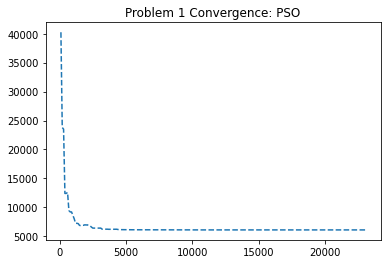

In [13]:
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])

plt.title("Problem 1 Convergence: PSO")
plt.plot(n_evals, opt, "--")
plt.show()